# *Libraries*

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder

In [2]:
#Dataframe creation
df= pd.read_csv("C:/Users/Aishwarya MMPL/Documents/GUVI_PYTHON/Projects/Copper/Copper_DataSet.csv")

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
#change the format of  item_date,delivery date
df["item_date_1"] =pd.to_datetime(df["item_date"],format= "%Y%m%d",errors="coerce").dt.date
df["delivery date_1"]=pd.to_datetime(df["delivery date"],format= "%Y%m%d",errors="coerce").dt.date

In [8]:
#change the format of  quantity tons
#we have e in col #173088 

df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")

In [9]:
# material ref data have both num and obj data so apply nan to all numerical data starts with "00000"
#As a result we got nan values as 100645 for material ref 
#over all records is 181672 we got nan as 100645, it almost 55% so drop the matertial ref value col
df["material_ref"]= df["material_ref"].apply(lambda x: np.nan if str(x).startswith ("00000") else x)
df["material_ref"].isnull().sum()

100645

In [10]:
#droping material ref column
df.drop("material_ref",axis=1, inplace=True)

In [11]:
# id has unique values and have 2 null values as a type of object so drop the column
df.drop("id",axis=1,inplace=True)

In [12]:
df.describe(include= "all")

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
count,1.816720e+05,1.816720e+05,1.816720e+05,181645.000000,181671,181673,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05,181670,181670
unique,NaN,NaN,NaN,NaN,9,7,NaN,NaN,NaN,NaN,NaN,NaN,250,26
top,NaN,NaN,NaN,NaN,Won,W,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-02,2021-01-01
freq,NaN,NaN,NaN,NaN,116010,105615,NaN,NaN,NaN,NaN,NaN,NaN,2779,33033
mean,2.020459e+07,5.874926e+03,3.051221e+07,44.893022,NaN,NaN,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03,NaN,NaN
std,4.551119e+03,2.349081e+06,2.433382e+07,24.404214,NaN,NaN,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05,NaN,NaN
min,1.995000e+07,-2.000000e+03,1.245800e+04,25.000000,NaN,NaN,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03,NaN,NaN
25%,2.020093e+07,1.097030e+01,3.019688e+07,26.000000,NaN,NaN,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02,NaN,NaN
50%,2.020113e+07,3.036464e+01,3.020524e+07,30.000000,NaN,NaN,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02,NaN,NaN
75%,2.021020e+07,6.716061e+01,3.028042e+07,78.000000,NaN,NaN,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02,NaN,NaN


In [13]:
# check the min of df found quantity tons & selling_price data as neagtive value so aplly np.nan fn to make it as NAN
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [14]:
df.describe(include= "all")

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
count,1.816720e+05,1.816680e+05,1.816720e+05,181645.000000,181671,181673,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816650e+05,181670,181670
unique,NaN,NaN,NaN,NaN,9,7,NaN,NaN,NaN,NaN,NaN,NaN,250,26
top,NaN,NaN,NaN,NaN,Won,W,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-02,2021-01-01
freq,NaN,NaN,NaN,NaN,116010,105615,NaN,NaN,NaN,NaN,NaN,NaN,2779,33033
mean,2.020459e+07,5.875066e+03,3.051221e+07,44.893022,NaN,NaN,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918124e+03,NaN,NaN
std,4.551119e+03,2.349107e+06,2.433382e+07,24.404214,NaN,NaN,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.318020e+05,NaN,NaN
min,1.995000e+07,1.000000e-05,1.245800e+04,25.000000,NaN,NaN,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,1.000000e-01,NaN,NaN
25%,2.020093e+07,1.097122e+01,3.019688e+07,26.000000,NaN,NaN,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02,NaN,NaN
50%,2.020113e+07,3.036501e+01,3.020524e+07,30.000000,NaN,NaN,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02,NaN,NaN
75%,2.021020e+07,6.716134e+01,3.028042e+07,78.000000,NaN,NaN,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02,NaN,NaN


In [15]:
df.isnull().sum(), df.dtypes

(item_date           1
 quantity tons       5
 customer            1
 country            28
 status              2
 item type           0
 application        24
 thickness           1
 width               0
 product_ref         0
 delivery date       1
 selling_price       8
 item_date_1         3
 delivery date_1     3
 dtype: int64,
 item_date          float64
 quantity tons      float64
 customer           float64
 country            float64
 status              object
 item type           object
 application        float64
 thickness          float64
 width              float64
 product_ref          int64
 delivery date      float64
 selling_price      float64
 item_date_1         object
 delivery date_1     object
 dtype: object)

Handling null values 

In [16]:
# To Fill NAN data
# 1, if its normal distrubution ---> fill with Mean()
# 2, if its Skewed distrubution ---> fill with Median()
# 3, if its catergorial distrubtion ---> fill with Mode()

In [17]:
df["item_date"].fillna(df["item_date"].mode().iloc[0],inplace=True)# categorial data and for mode so need to specific index so use iloc[0]
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)# Skewed data
df["customer"].fillna(df["customer"].median(),inplace=True)# Skewed data
df["country"].fillna(df["country"].median(),inplace=True)# Skewed data
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)# categorial data and for mode so need to specific index so use iloc[0]
df["application"].fillna(df["application"].median(),inplace=True)# Skewed data
df["thickness"].fillna(df["thickness"].median(),inplace=True)# Skewed data
df["delivery date"].fillna(df["delivery date"].mode().iloc[0],inplace=True)# categorial data and for mode so need to specific index so use iloc[0]
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)# Skewed data
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)# categorial data and for mode so need to specific index so use iloc[0]
df["delivery date_1"].fillna(df["delivery date_1"].mode().iloc[0],inplace=True)# categorial data and for mode so need to specific index so use iloc[0]

In [18]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

Encoding the data

In [19]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [20]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [21]:
df["status"].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [22]:
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

In [23]:
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [24]:
df.describe()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
count,1.816730e+05,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816730e+05,1.816730e+05
mean,2.020459e+07,5.874905e+03,3.051221e+07,44.890727,1.316684,4.133036,25.614406,2.564822,1295.286724,4.739679e+08,2.020738e+07,1.918076e+03
std,4.551114e+03,2.349075e+06,2.433375e+07,24.403034,1.330310,1.055230,17.753421,6.572303,261.631754,7.175101e+08,2.411052e+04,3.317947e+05
min,1.995000e+07,1.000000e-05,1.245800e+04,25.000000,0.000000,0.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,1.000000e-01
25%,2.020093e+07,1.097167e+01,3.019688e+07,26.000000,1.000000,3.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036501e+01,3.020524e+07,30.000000,1.000000,5.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716038e+01,3.028042e+07,78.000000,1.000000,5.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,8.000000,6.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [25]:
df.to_csv("Industrial proper copper",index=False)

In [26]:
# detecting the skewed columns using plot
def skewed(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [27]:
#except dates every columns are skewed
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

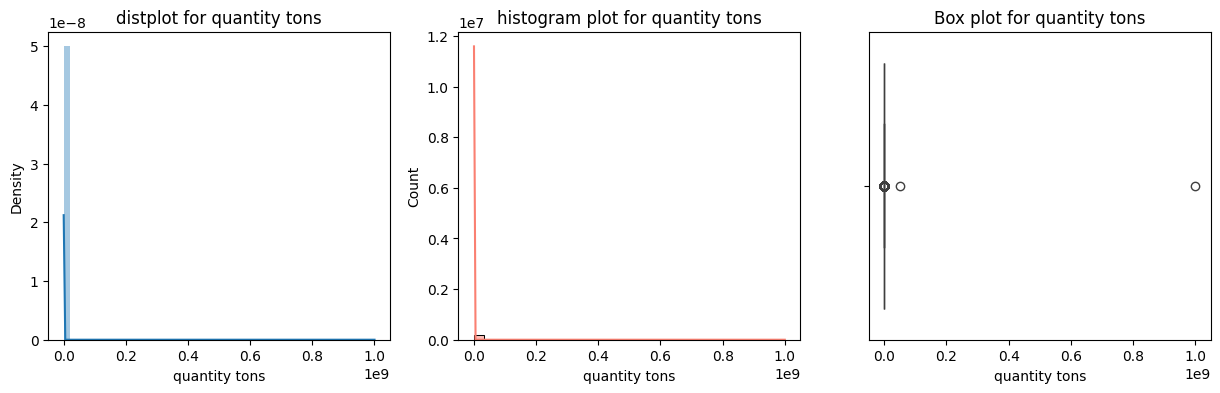

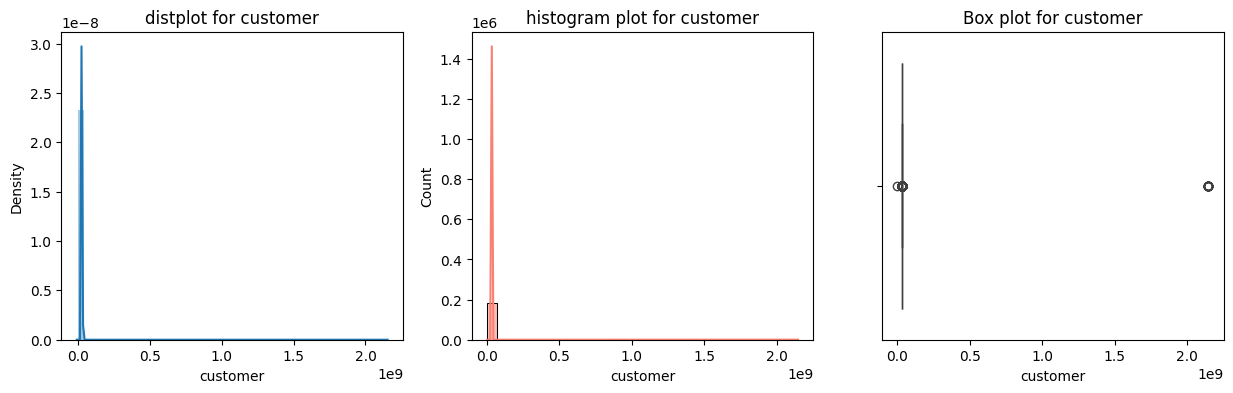

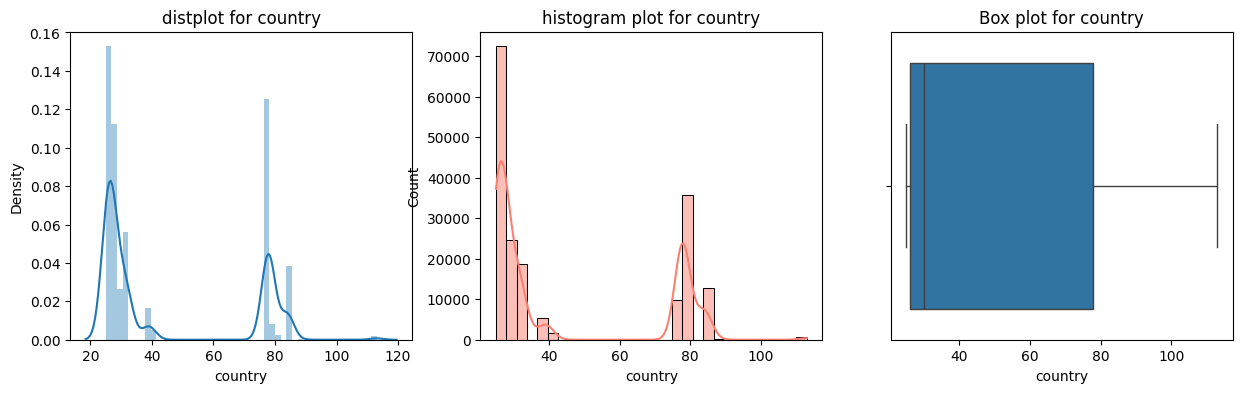

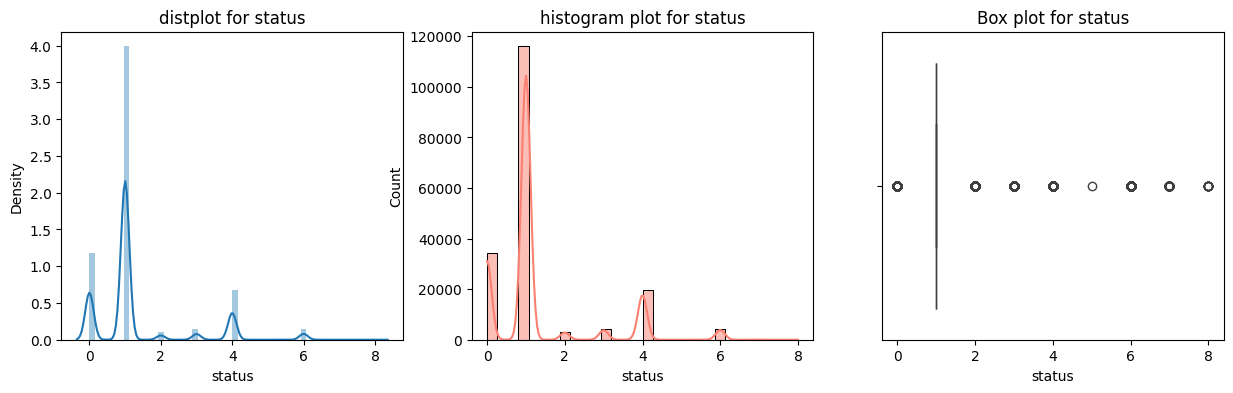

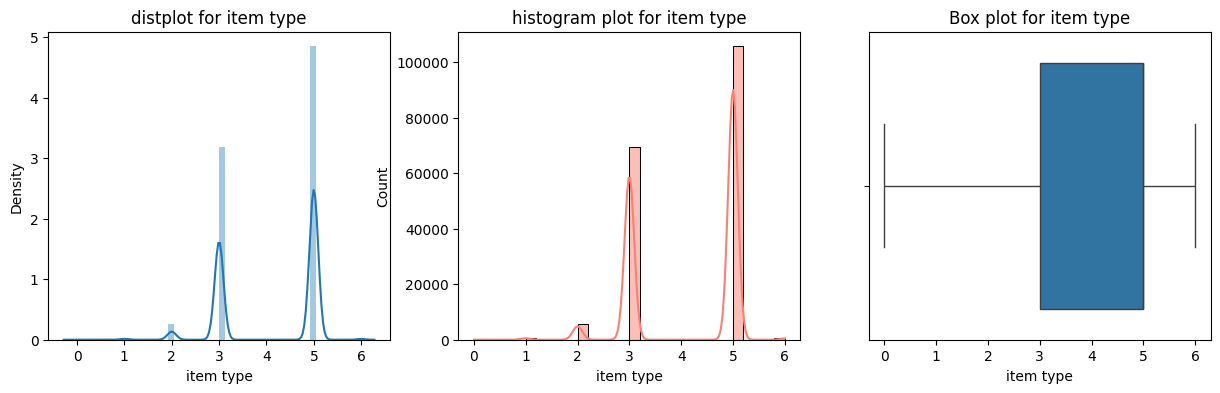

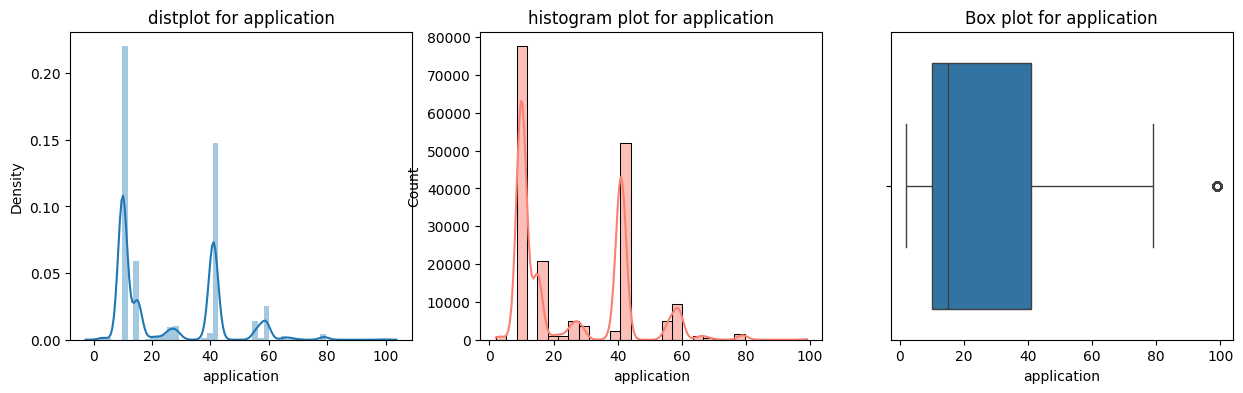

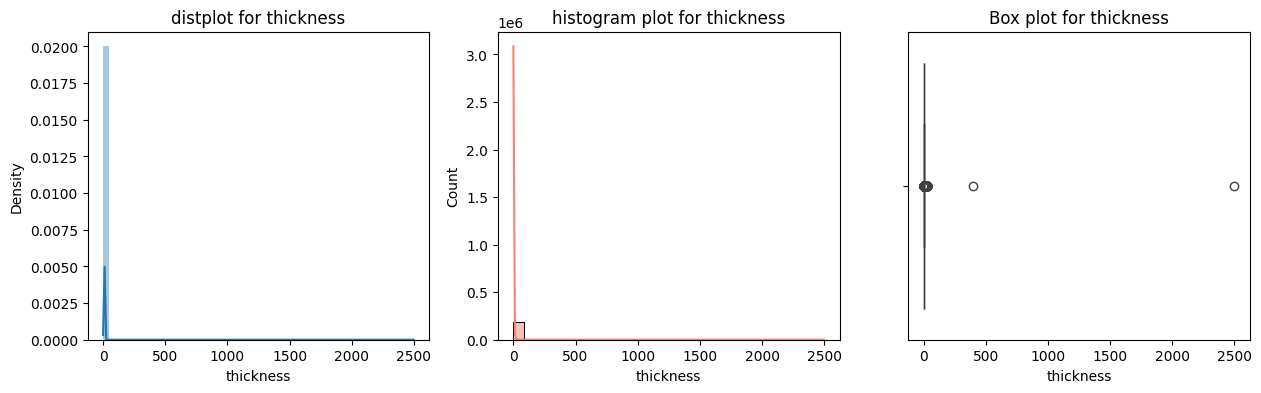

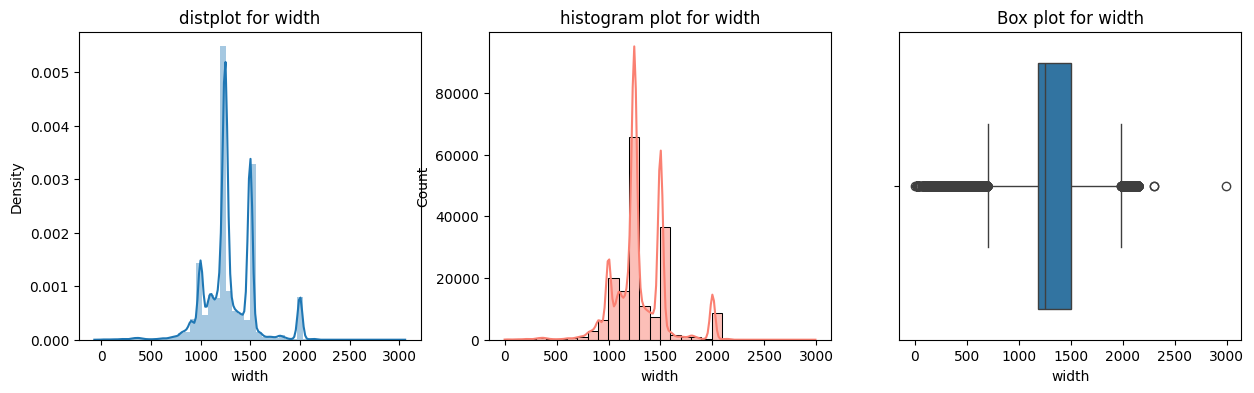

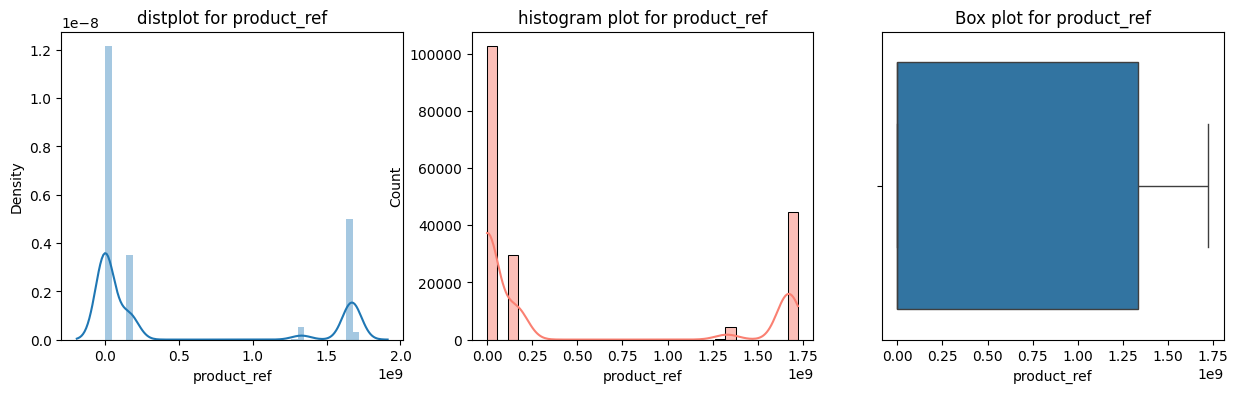

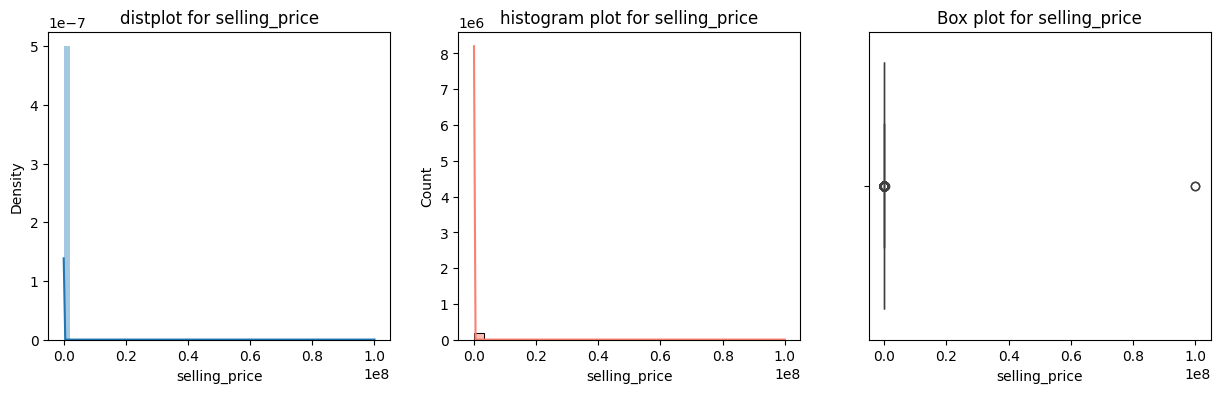

In [28]:
for i in skewed_columns:
    skewed(df,i)

In [29]:
#Skewed columns:
# 1.quantity tons, 2.customer, 3.thickness, 4.selling_price

In [30]:
#creating new datatframe 
df1= df.copy()

In [31]:
#using log to recreate skewed data

df1["quantity tons_log"]= np.log(df1["quantity tons"])
df1["customer_log"]= np.log(df1["customer"])
df1["thickness_log"]= np.log(df1["thickness"])
df1["selling_price_log"]= np.log(df1["selling_price"])

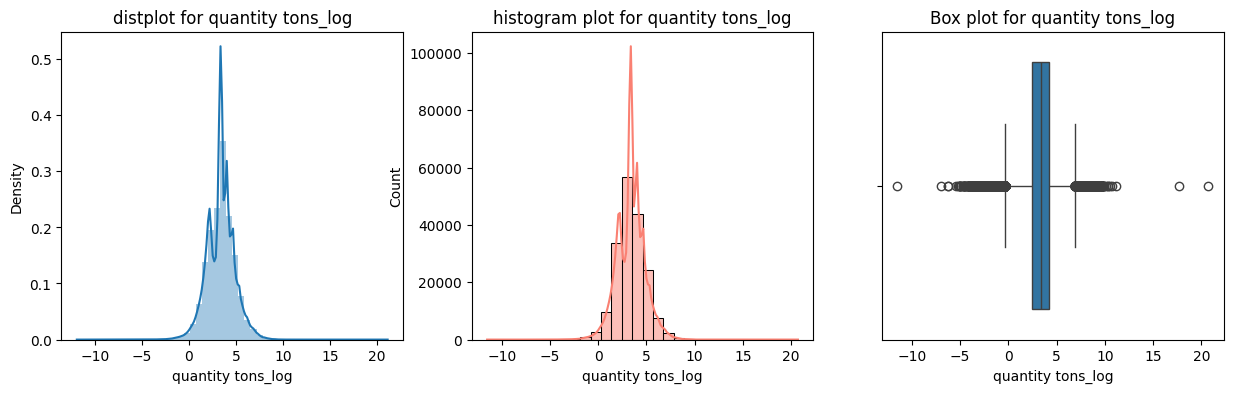

In [32]:
skewed(df1,"quantity tons_log")

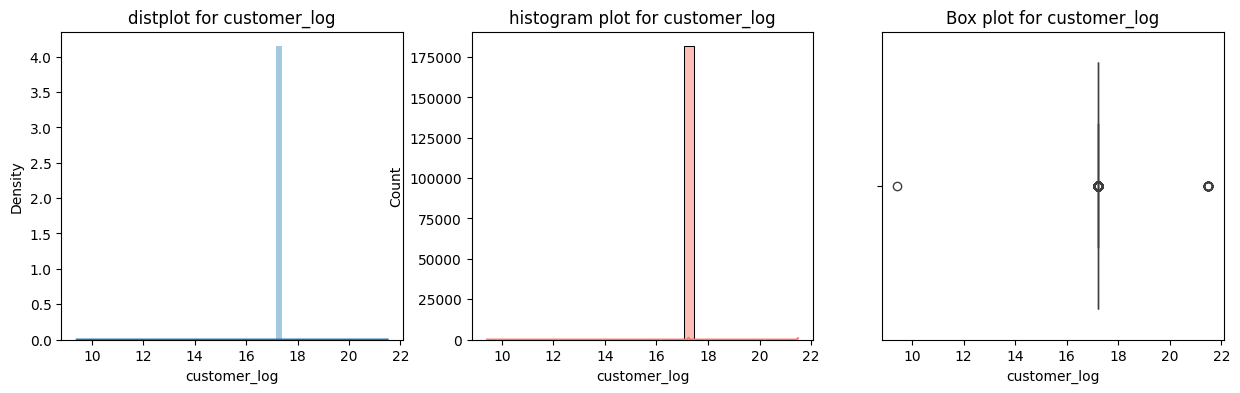

In [33]:
skewed(df1,"customer_log")

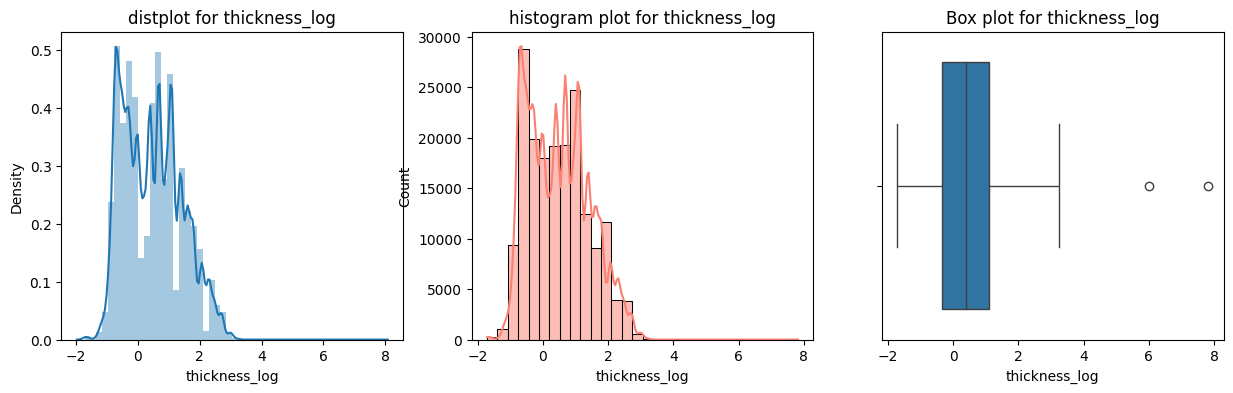

In [34]:
skewed(df1,"thickness_log")

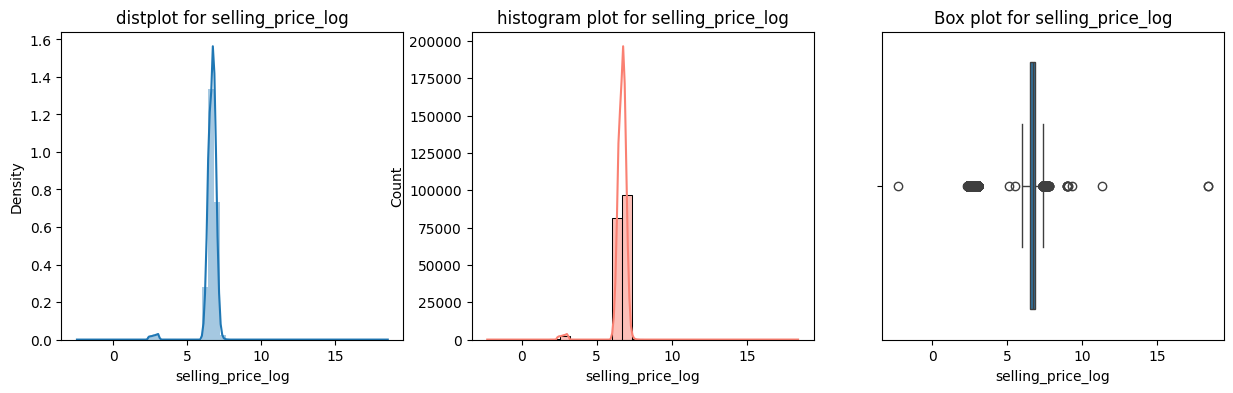

In [35]:
skewed(df1,"selling_price_log")

# Outliers Handling - Interquartile Range(IQR) Method

In [36]:
df2= df1.copy()

In [37]:
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [38]:
def outlier(df,column):
  q1= df[column].quantile(0.25)# to find quantile 25%
  q3= df[column].quantile(0.75)# to find quantile 75%

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold) # clip is used to set the limit from lower to upper threshold

In [39]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery date_1',
       'quantity tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [40]:
# As per skewed data all 4 col have outliers ('quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log') and checked in distrubution 
#plot found col('width','application') as also outliers 
outliers_col=['quantity tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outliers_col:
  outlier(df2,i)

In [41]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [42]:
# for i in outliers_col:
#     outlier(df2,i)

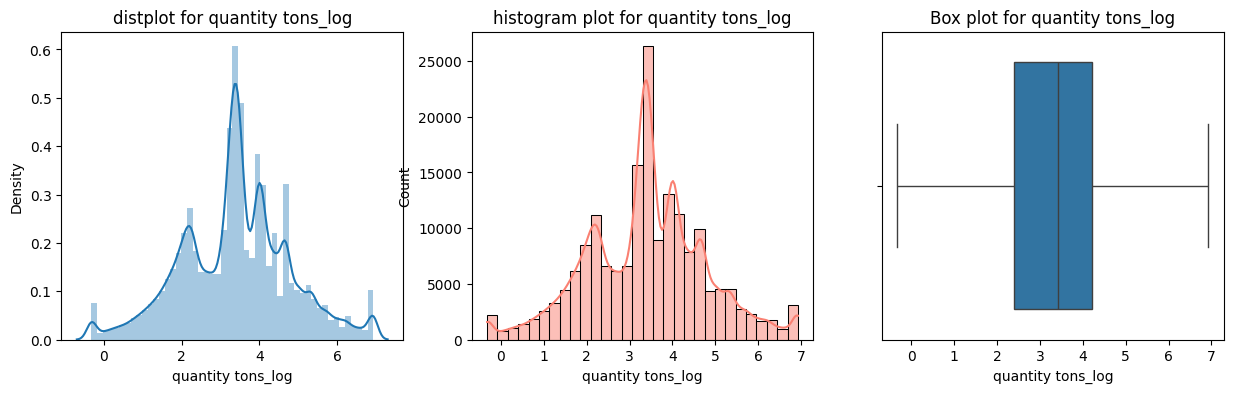

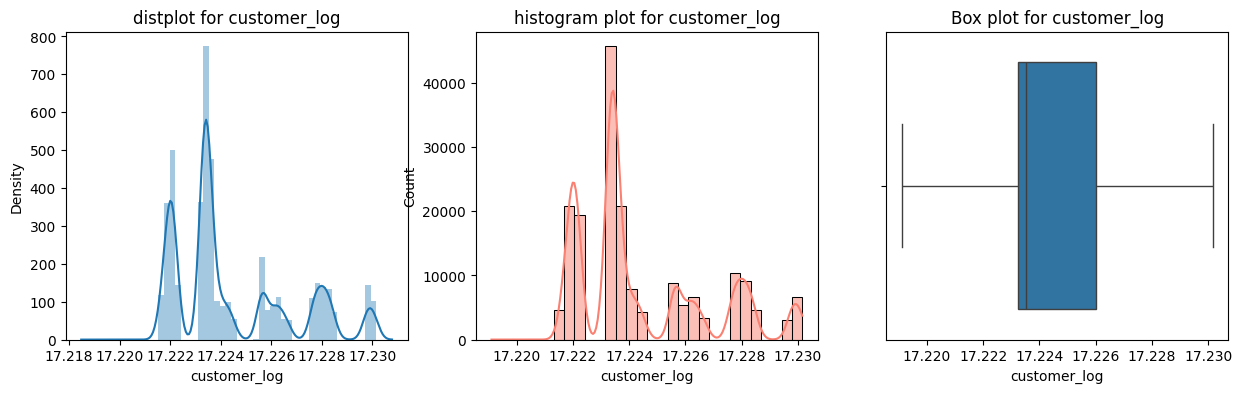

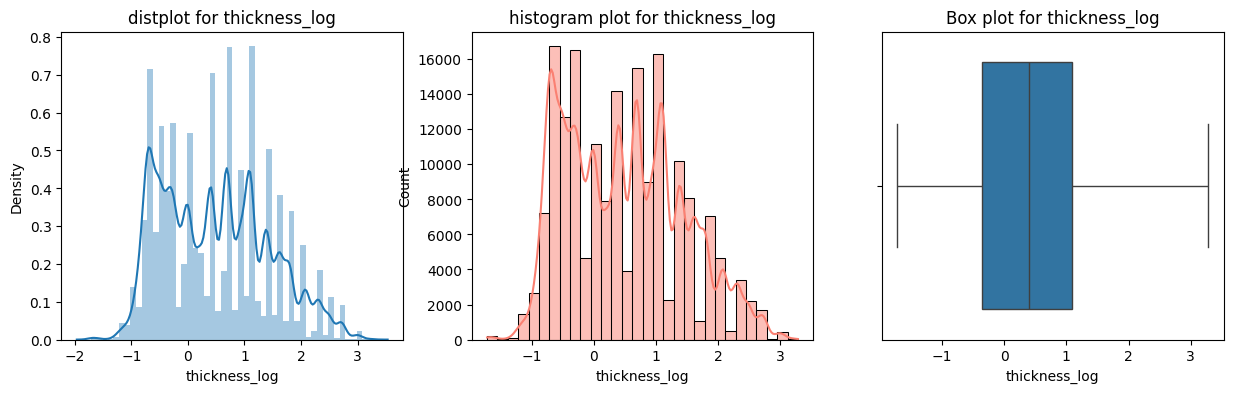

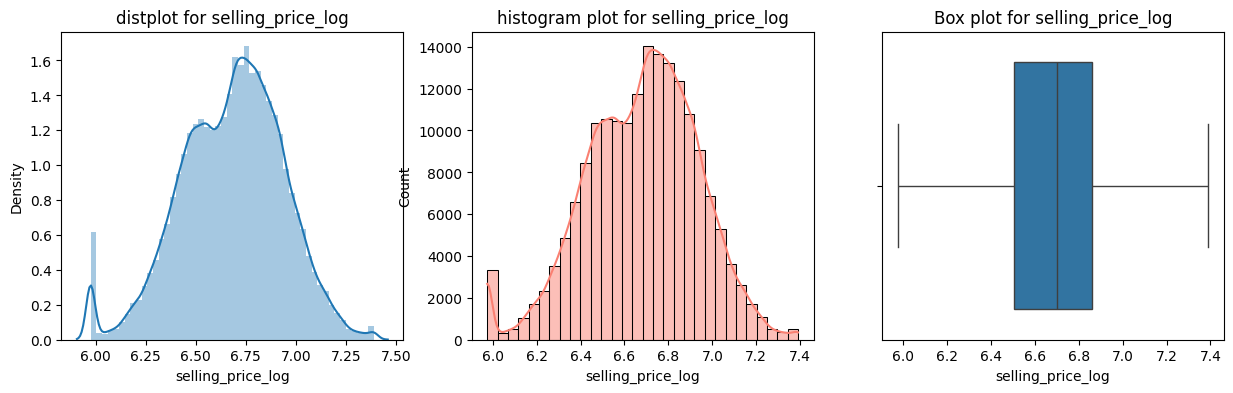

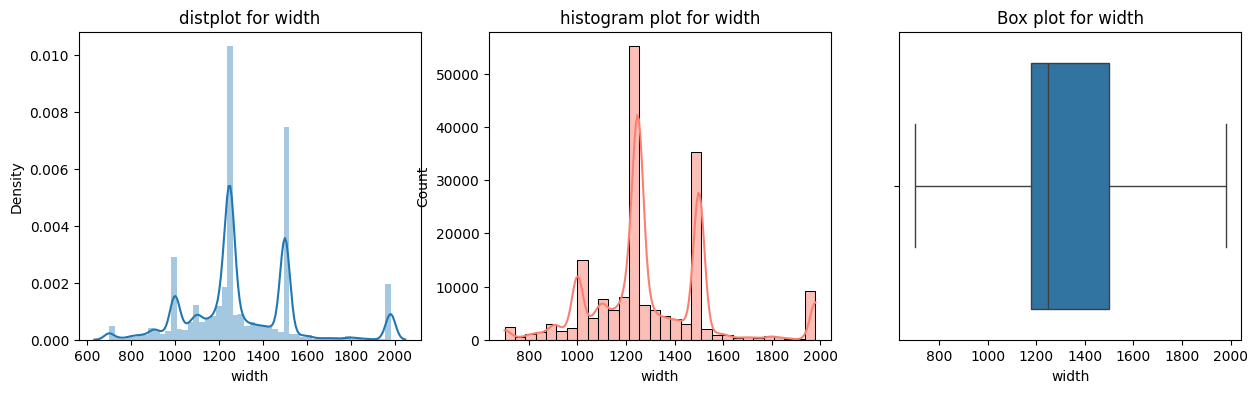

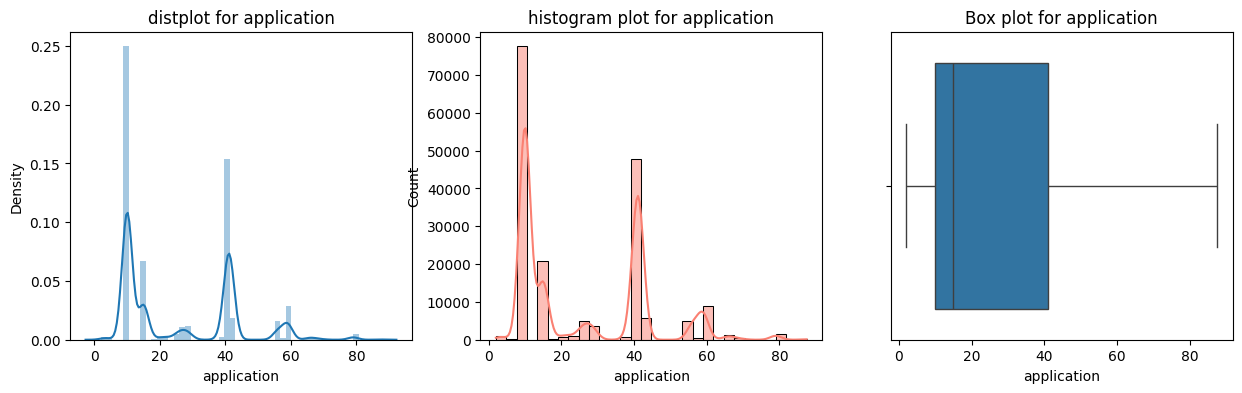

In [43]:
for i in outliers_col:
    skewed(df2,i)

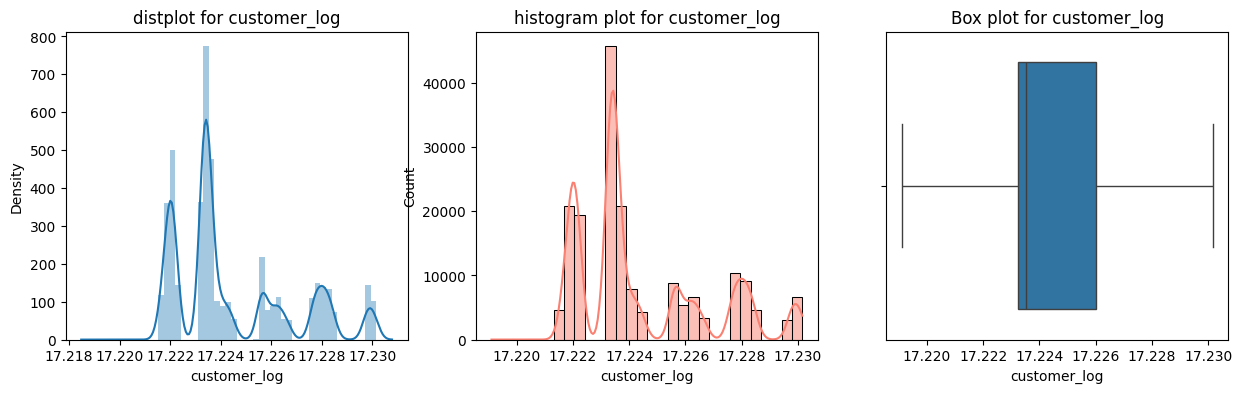

In [44]:
skewed(df2,'customer_log')

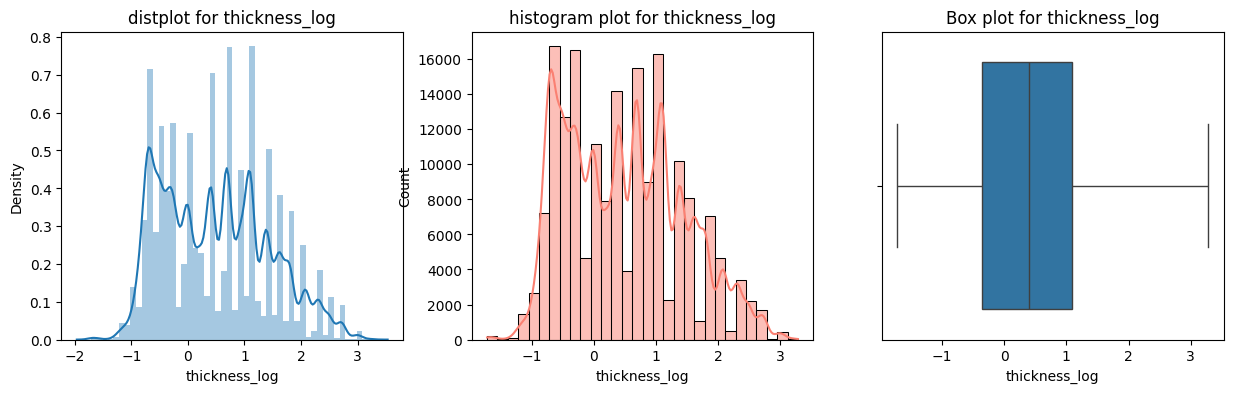

In [45]:
skewed(df2,'thickness_log')

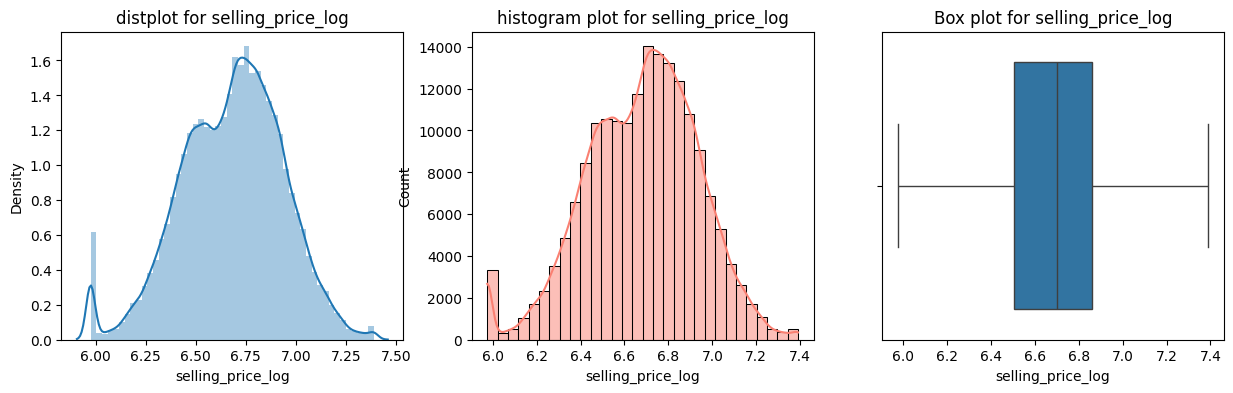

In [46]:
skewed(df2,'selling_price_log')

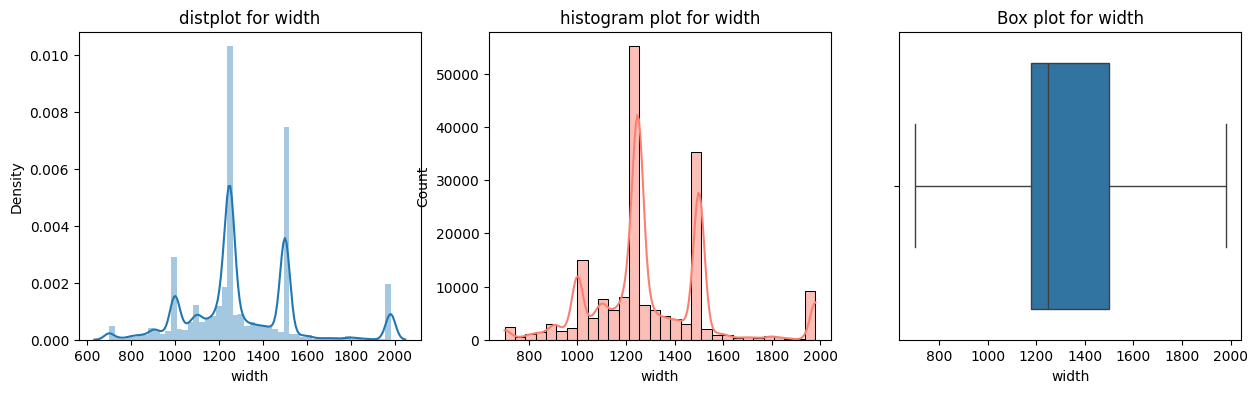

In [47]:
skewed(df2,'width')

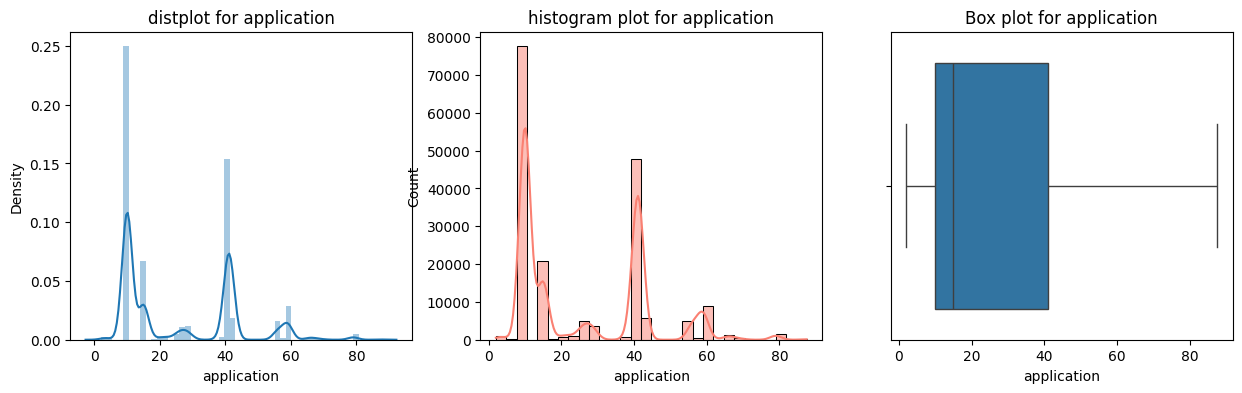

In [48]:
skewed(df2,'application')

In [49]:
#Droping the unwanted skewed columns
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

df2.drop(columns=["quantity tons","customer","thickness","selling_price"], axis=1, inplace=True)

In [50]:
df3= df2.copy()

In [51]:
df3

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595


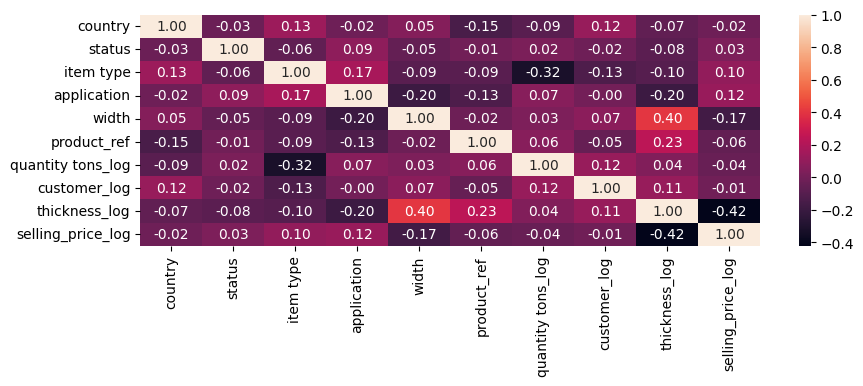

In [52]:
#Checking the correlation with using the heatmap and ignore the date time format columns due to error 
data= df3.drop(columns=["item_date", "delivery date","item_date_1","delivery date_1"]).corr()
plt.figure(figsize=[10,3])
sns.heatmap(data,fmt="0.2f", annot= True)
plt.show()

In [53]:
# the high correlations are "-0.42", "0.40", "-0.32", "-0.20","0.23"

delivery data handling using ml prediction

In [162]:
df4= df3.copy()

In [164]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [165]:
df4["item_date_1"]=pd.to_datetime(df4["item_date_1"])
df4["delivery date_1"]=pd.to_datetime(df4["delivery date_1"])

In [166]:
#converting the datatype (object to datetime format)
df4["days_differ"]= (df4["delivery date_1"]-df4["item_date_1"]).dt.days

In [58]:
df4

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,days_differ
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1


In [59]:
#Most of the values are -ve in differ days so need ml prediction
# And to find the difference seperate items dates into day,month,year

In [167]:
df4["item_date_days"]= df4["item_date_1"].dt.day
df4["item_date_months"]=df4["item_date_1"].dt.month
df4["item_date_years"]= df4["item_date_1"].dt.year

In [92]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,days_differ,item_date_days,item_date_months,item_date_years
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [168]:
df4_postive= df4[(df4["days_differ"]>=0)]
df4_postive.reset_index(drop=True, inplace=True)
df4_postive.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,days_differ,item_date_days,item_date_months,item_date_years
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,17.223667,-0.967584,5.975038,91,1,4,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,17.228025,-0.510826,7.217443,91,1,4,2021


In [169]:
df4_negative= df4[(df4["days_differ"]<0)]
df4_negative.reset_index(drop=True, inplace=True)
df4_negative.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,days_differ,item_date_days,item_date_months,item_date_years
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [42]:
# now we want to create the model for delivery date prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [172]:
#Find the best algorithm for the "delivery date" prediction

def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date_1", "delivery date_1", "days_differ"])
  y= df["days_differ"]

  #teain test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)

  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics

In [ ]:
print(accuracy_date_prediction(df4_postive,DecisionTreeRegressor))
print(accuracy_date_prediction(df4_postive,RandomForestRegressor))
print(accuracy_date_prediction(df4_postive,ExtraTreesRegressor))
print(accuracy_date_prediction(df4_postive,GradientBoostingRegressor))
print(accuracy_date_prediction(df4_postive,AdaBoostRegressor))

In [174]:
# Model for the RandomForest

def RandomForest(train_df, test_df):

  x= train_df.drop(columns=["item_date_1", "delivery date_1", "days_differ"])
  y= train_df["days_differ"]

  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  data= test_df.drop(columns=["item_date_1", "delivery date_1", "days_differ"])

  y_pred=model.predict(data)

  return y_pred

In [175]:
date_difference= RandomForest(df4_postive,df4_negative)

In [176]:
date_difference

array([17.18, 17.09,  0.  , ..., 30.  , 30.  , 30.  ])

In [177]:
data_difference_1=[]

for i in date_difference:
    data= int(round(i,0))
    data_difference_1.append(data)

In [ ]:
data_difference_1# coverted negatiive value to positive value

In [178]:
df4_negative["days_differ"]=pd.DataFrame(data_difference_1)

In [134]:
df4_negative

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,days_differ,item_date_days,item_date_months,item_date_years,date_differ
0,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021,17
1,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021,17
2,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021,0
3,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,17.228050,-0.385662,6.836259,-90,1,4,2021,17
4,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,17.228050,-0.597837,6.860664,-90,1,4,2021,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020,30
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020,30
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020,30
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020,30


In [179]:
#find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, days_differ):
  date= item_date + pd.to_timedelta(days_differ,unit= "D")
  return date

In [180]:
df4_negative["delivery date_1"]= find_delivery_date(df4_negative["item_date_1"],df4_negative["days_differ"])

In [181]:
# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows
df_final=pd.concat([df4_postive,df4_negative],axis=0,ignore_index=True)

In [159]:
df_final

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,customer_log,thickness_log,selling_price_log,days_differ,item_date_days,item_date_months,item_date_years,date_differ
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021,NaN
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021,NaN
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021,NaN
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,17.223667,-0.967584,5.975038,91,1,4,2021,NaN
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,17.228025,-0.510826,7.217443,91,1,4,2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020,30.0
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020,30.0
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020,30.0
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020,30.0


In [182]:
# Now we create the three new columns using the "delivery_date_1"
df_final['delivery_date_day']= df_final["delivery date_1"].dt.day
df_final['delivery_date_month']= df_final["delivery date_1"].dt.month
df_final['delivery_date_year']= df_final["delivery date_1"].dt.year

In [ ]:
df_final["date_differ"].isnull().sum()

In [153]:
df_final.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery date_1',
       'quantity tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'days_differ', 'item_date_days',
       'item_date_months', 'item_date_years', 'date_differ',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [184]:
# Droping the unwanted columns
df_final.drop(columns=["item_date","delivery date","item_date_1","delivery date_1","days_differ"],inplace=True)

In [187]:
# Saveing the dataframe
df_final.to_csv("Industrial_Copper_Colab.csv",index= False)

In [185]:
df_final.tail()

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_days,item_date_months,item_date_years,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


# **Classification Method - Predict (Won/Lose)**

In [38]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
#Dataframe creation
df_class= pd.read_csv("C:/Users/Aishwarya MMPL/Documents/GUVI_PYTHON/Projects/Industrial_Copper_Colab.csv")

In [27]:
df_final=df_class

In [5]:
df_class.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_days', 'item_date_months',
       'item_date_years', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [6]:
df_class["status"].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [7]:
# filter the status column only want to be a (won& loss)
df_c= df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]

In [8]:
df_c.tail()

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_days,item_date_months,item_date_years,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [9]:
df_c["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [10]:
x= df_c.drop(columns=["status"],axis=1)
y= df_c["status"]

In [11]:
x.shape,y.shape

((150450, 15), (150450,))

In [39]:
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import pickle

In [13]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [14]:
x_new.shape,y_new.shape

((230024, 15), (230024,))

In [15]:
y_new.value_counts()

status
1    115012
0    115012
Name: count, dtype: int64

In [ ]:
# now the data is balanced
# so, we continue the ML prediction 

In [16]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [61]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9514124293785311}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9705217680292456}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9742771684945164}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8161349285476902, 'Accuracy_Test': 0.8145895646394151}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8365653040877368, 'Accuracy_Test': 0.8352276503821868}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9457294782319707, 'Accuracy_Test': 0.9316384180790961}


In [62]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9655352253466035}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9999945672841853, 'Accuracy_Test': 0.9820070407231952}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9850493285236211}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7733362307817678, 'Accuracy_Test': 0.7708070754921987}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8176019992394198, 'Accuracy_Test': 0.8151810161241253}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9531482588145814, 'Accuracy_Test': 0.9469120778825677}


In [ ]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# so we want the reduce the overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [ ]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV

x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

In [36]:
gridsearch.cv_results_

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
gridsearch.best_score_

In [ ]:
gridsearch.best_params_

In [17]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9861807748112966
Accuracy_Test:  0.9698511031409629
  
Confution_matrix for Test
--------------------------
[[22837   370]
 [ 1017 21781]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23207
           1       0.98      0.96      0.97     22798

    accuracy                           0.97     46005
   macro avg       0.97      0.97      0.97     46005
weighted avg       0.97      0.97      0.97     46005



In [ ]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [18]:
FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.01594347 1.        ]
[0.         0.95539082 1.        ]
 
auc_curve: 0.9697236792113673


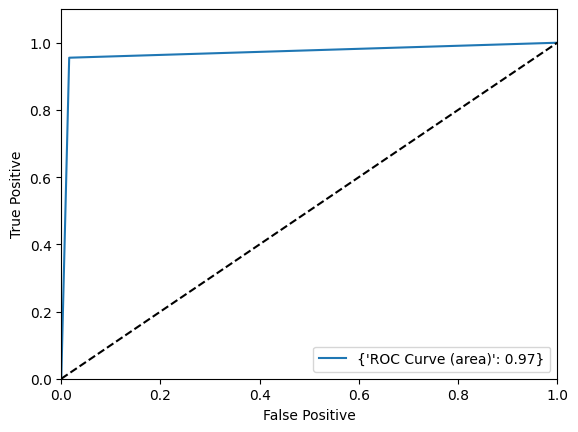

In [19]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [20]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


In [21]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [24]:
with open("Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [25]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


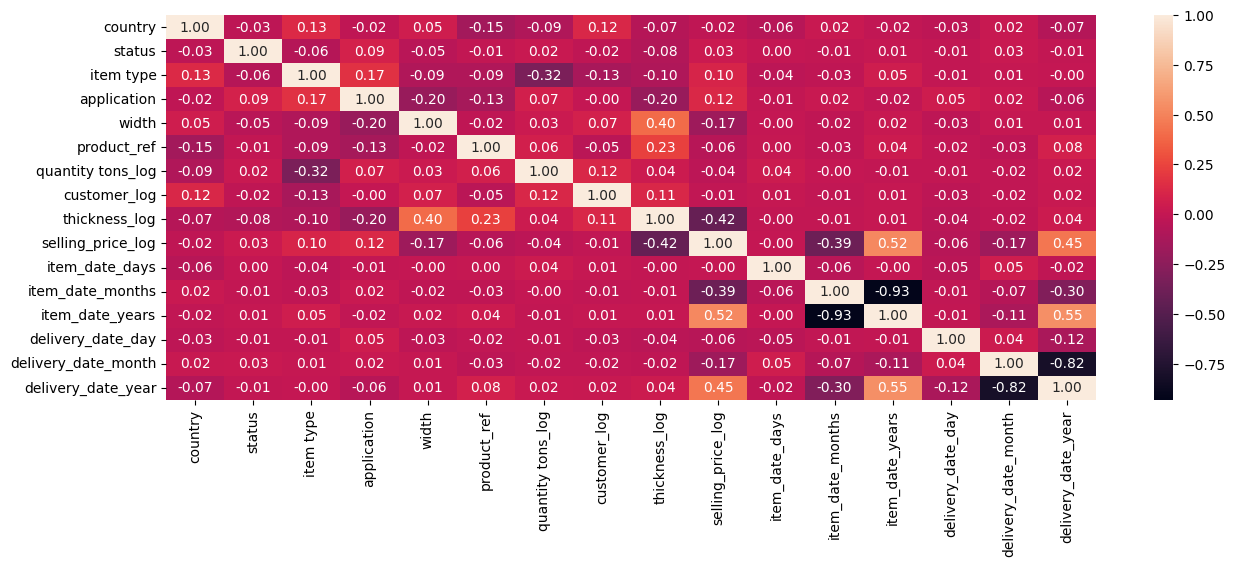

In [28]:
corr= df_final.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True, fmt="0.2f")
plt.show()

# **Regression Method - Predict the Selling Price**

In [29]:
#packages

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [30]:
df_regg= df_final.copy()

In [31]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [32]:
print(accuracy_regressor(df_regg, DecisionTreeRegressor))
print(accuracy_regressor(df_regg, RandomForestRegressor))
print(accuracy_regressor(df_regg, ExtraTreesRegressor))
print(accuracy_regressor(df_regg, AdaBoostRegressor))
print(accuracy_regressor(df_regg, GradientBoostingRegressor))
print(accuracy_regressor(df_regg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.925932099708495}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9939855905918533, 'R2_Test': 0.9573144168540154}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9547113382196618}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.6545853622432976, 'R2_Test': 0.6532744368774318}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.8862657522936667, 'R2_Test': 0.8867712224581823}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.9520762464823139, 'R2_Test': 0.9464676149431908}


In [ ]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [ ]:
x= df_regg.drop(columns=["selling_price_log"], axis=1)
y= df_regg["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [2,4,10,20],
               "min_samples_split": [2,5,10],
               "min_samples_leaf": [1,2,4],
               "max_features": ["sqrt","log2",None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

In [34]:
gridsearch_r

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
gridsearch_r.cv_results_

In [43]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test


(0.9866050200102822, 0.9563144837750839)

In [44]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9564750466011707,
 'Mean Absolute Error': 0.03237350000527505,
 'Mean Squared Error': 0.002865817590804624,
 'Root Mean Squared Error': 0.05353333158700871}

In [45]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))


Predicted selling price with Log:  7.114446993541273
Predicted selling price without Log:  1229.603444504069


In [46]:
import pickle

In [47]:
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)

In [48]:
with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [49]:
df_final.head()

,country,status,item type,application,width,product_ref,quantity tons_log,customer_log,thickness_log,selling_price_log,item_date_days,item_date_months,item_date_years,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


In [50]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.872792432055746
Predicted selling price without Log:  965.6412921331196
